# Graphs for Data Visualization


## Import librairies

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.optimize import curve_fit 


## Create folder to save figures

In [2]:
def createFolder(folder_path):
    folder_path = Path(folder_path)
    folder_path.mkdir(parents=True, exist_ok=True)

fig_folder = Path('output figures')
createFolder(fig_folder)

## Load dataset

In [3]:
folder_dataset_processed = Path('data/processed_data')

df_A673 = pd.read_csv(folder_dataset_processed / 'A673_processed_data.csv', index_col=0)
df_PDX = pd.read_csv(folder_dataset_processed / 'PDX_processed_data.csv', index_col=0)

df_A673
#df_PDX

,spheroid ID,Experiment ID,drug concentration (uM),spheroIndex,Area (um2)_day0,Area (um2)_day1,Area (um2)_day2,Mean grey value_day0,Mean grey value_day1,Mean grey value_day2,...,Grey2-0,Grey2-1,DCorrelation_1-0,DCorrelation_2-0,DCorrelation_2-1,viability score,2 classes,2 classes encoded,3 classes,3 classes encoded
0,"(1803, 2, 0.1)",1803,0.1,2,21010.765200,NaN,40799.3564,273.563070,NaN,363.215620,...,89.652550,NaN,NaN,0.014911,NaN,78.738935,alive,0,alive,0
1,"(1803, 3, 0.1)",1803,0.1,3,18284.785800,30485.2706,41872.7440,446.811893,477.670048,357.425043,...,-89.386850,-120.245005,0.008844,0.027155,0.018311,81.441218,alive,0,alive,0
2,"(1803, 4, 0.1)",1803,0.1,4,15930.772400,27041.9282,NaN,233.473857,386.175899,NaN,...,NaN,NaN,0.007834,NaN,NaN,103.152664,alive,0,alive,0
3,"(1803, 5, 0.1)",1803,0.1,5,18412.317000,27653.0152,42882.3660,316.993179,370.756607,350.027196,...,33.034017,-20.729411,0.028224,0.028457,0.000233,76.813170,alive,0,alive,0
4,"(1803, 6, 0.1)",1803,0.1,6,15771.358400,26930.3384,41112.8706,311.382544,334.841864,466.537552,...,155.155008,131.695688,0.005906,-0.002487,-0.008393,73.893462,alive,0,middle,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,"(2901, 6, 20.0)",2901,20.0,6,18838.827310,NaN,23247.8750,346.617821,NaN,1069.836070,...,723.218249,NaN,NaN,-0.060875,NaN,42.281003,dead,1,middle,2
348,"(2901, 11, 20.0)",2901,20.0,11,19408.304872,NaN,27647.7014,242.379733,NaN,1047.332597,...,804.952864,NaN,NaN,-0.054548,NaN,34.153426,dead,1,middle,2
349,"(2901, 18, 20.0)",2901,20.0,18,17977.776798,NaN,21930.0526,306.838603,NaN,924.446711,...,617.608107,NaN,NaN,-0.039745,NaN,44.481610,dead,1,middle,2
350,"(2901, 12, 50.0)",2901,50.0,12,14365.307914,NaN,16345.2488,305.499310,NaN,1027.062685,...,721.563375,NaN,NaN,-0.061309,NaN,4.012441,dead,1,dead,1


## Define  colors palette, sizes... for graphs

In [4]:
# Graph features
fontsize_title = 10
fontsize_label = 10
fontsize_tick = 9

# Color palette for classification
palette_class = {
            'alive': (51/255, 117/255, 56/255) ,  # Vert
            'middle' : (240/255, 228/255, 66/255), # Yellow
            'dead': (194/255, 106/255, 119/255)   # Magenta
             }

# Color palette cell type
palette_cells = {
    'A673': (  7/255, 126/255, 151/255),     # Blue
    'PDX':  (255/255, 147/255,  38/255)      # Orange
}

palette_drug_A673 = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=False, n_colors=8)
palette_drug_PDX = sns.color_palette("Oranges", as_cmap=False, n_colors=8)

"""
colors_dict = {'A673': ['#0F99B2', # bleu clair
                          '#055F72' # bleu foncé
                        ],
         'PDX': ['#FF9326', # orange clair
                 '#AC5600' # orange foncé
                ]}
"""
# Set graph theme
sns.set(font='Arial')
sns.set_theme(context='paper', style='ticks')


In [5]:
# Define kws_dict_A673 and kws_dict_PDX: dictionnaries with graph parameters perso

marker_size = 20
line_size = 1

kws_dict_A673 = {
   2602:
        {
        'marker' : 's',
        'line' : 'dashdot',
        'marker_col' : (82/255, 24/255, 133/255),
        'line_col' : (82/255, 24/255, 133/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    1803:
        {
        'marker' : 'o',
        'line' : '-',
        'marker_col' : (31/255, 79/255, 126/255),
        'line_col' : (1/255, 114/255, 114/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    2901:
        {
        'marker' : '^',
        'line' : '--',
        'marker_col' : (131/255, 27/255, 91/255),
        'line_col' : (99/255, 20/255, 69/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    
}


kws_dict_PDX = {
   1806:
        {
        'marker' : 's',
        'line' : 'dashdot',
        'marker_col' : (203/255, 60/255, 52/255),
        'line_col' : (166/255, 49/255, 43/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    1305:
        {
        'marker' : 'o',
        'line' : '-',
        'marker_col' : (255/255, 128/255, 0/255),
        'line_col' : (192/255, 96/255, 0/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    2406:
        {
        'marker' : '^',
        'line' : '--',
        'marker_col' : (129/255, 128/255, 71/255),
        'line_col' : (129/255, 128/255, 71/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    
}


## Dataset description

### Count NaN

In [6]:
# A673
nan_rows = df_A673.isna().any(axis=1)
print('For A673: \nTotal rows with Nan:', nan_rows.sum())
print('Proportion of rows with Nan:', round(nan_rows.sum()/len(df_A673)*100), '%')

# Count only for data at day 2

mask_experiment_2901 = df_A673['Experiment ID'] == 2901 # Create a mask for rows where 'Experiment ID' is 2901
cols_to_check = [col for col in df_A673.columns if not col.endswith('day 1')] # Select columns that do not end with 'day 1'

nan_rows = df_A673.loc[~mask_experiment_2901, cols_to_check].isna().any(axis=1) # Apply the mask: check for NaN values, but exclude 'day 1' columns for rows where 'Experiment ID' is 2901
print("\nDon't take into account data day 1 for experiment 2901 (missing data)")
print('Total rows with NaN:', nan_rows.sum())
print('Proportion of rows with NaN:', round(nan_rows.sum() / len(df_A673) * 100, 2), '%')

# PDX
nan_rows = df_PDX.isna().any(axis=1)
print('\n\nFor PDX: \nTotal rows with Nan:', nan_rows.sum())
print('Proportion of rows with Nan:', round(nan_rows.sum()/len(df_PDX)*100), '%')

For A673: 
Total rows with Nan: 180
Proportion of rows with Nan: 51 %

Don't take into account data day 1 for experiment 2901 (missing data)
Total rows with NaN: 41
Proportion of rows with NaN: 11.65 %


For PDX: 
Total rows with Nan: 69
Proportion of rows with Nan: 14 %


### Description classes

In [7]:
feat_A673 = [
    'Mean grey value_day2',
    'Correlation_day2',
    'Grey2-0',
    'Growth2-0',
    'Homogeneity_day2',
    'Equivalent Diameter (um)_day2',
    'Area (um2)_day2',
    'Energy_day2',
    'Solidity_day2',
    'Circularity_day2',
    'Perimeter (um)_day2',
    'Equivalent Diameter (um)_day0',
    'Area (um2)_day0'
]

feat_PDX = [
        'Mean grey value_day1',
    'Mean grey value_day2',
    'Grey1-0',
    'Grey2-0',
    'Correlation_day1',
    'Correlation_day2',
    'Solidity_day2',
    'Circularity_day2',
    'Circularity_day1',
    'Perimeter (um)_day2',
    'Solidity_day1',
    'Grey2-1',
    'Perimeter (um)_day1',
    'Area (um2)_day2',
    'Equivalent Diameter (um)_day2'
]

df_A673_copy = df_A673.copy()
df_PDX_copy = df_PDX.copy()

df_A673_copy = df_A673_copy.dropna(subset=feat_A673).reset_index(drop=True)
df_PDX_copy = df_PDX_copy.dropna(subset=feat_PDX).reset_index(drop=True)



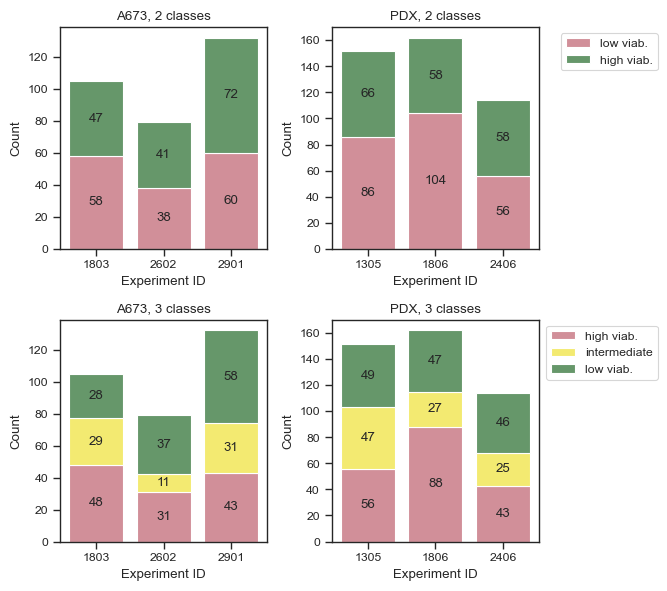

In [8]:
x = 'Experiment ID'
h2 = '2 classes'
h3 = '3 classes'

# Transform Experiment ID into string values
df_A673_copy[x] = df_A673_copy[x].astype('str')
df_PDX_copy[x] = df_PDX_copy[x].astype('str')

# Initialize figure
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
axes = axes.flatten()

### Plot histograms
# A673, 2 classes
sns.histplot(data=df_A673_copy, x=x, hue=h2, multiple='stack', palette=palette_class, shrink=.8, ax=axes[0], legend=False)

# PDX, 2 classes
sns.histplot(data=df_PDX_copy, x=x, hue=h2, multiple='stack', palette=palette_class, shrink=.8, ax=axes[1])

# A673, 2 classes
sns.histplot(data=df_A673_copy, x=x, hue=h3, multiple='stack', palette=palette_class, shrink=.8, ax=axes[2], legend=False)

# PDX, 3 classes
sns.histplot(data=df_PDX_copy, x=x, hue=h3, multiple='stack', palette=palette_class, shrink=.8, ax=axes[3])


### Add numbers corresponding to each bar
def number(axes):
    for p in axes.patches:
    # Coordinates of each bar
        height = p.get_height()
        width = p.get_width()
        x_pos = p.get_x() + width / 2 
        y_pos = p.get_y() + height / 2
        offset = 0.05 
    
        # If bars greater than 0, displays the number of elements corresponding to the bar
        if height > 0:
            axes.text(x_pos, y_pos + offset, f'{int(height)}', ha='center', va='center')

for i in range(4):
    number(axes[i])

### Add titles
axes[0].set_title('A673, 2 classes')
axes[1].set_title('PDX, 2 classes')
axes[2].set_title('A673, 3 classes')
axes[3].set_title('PDX, 3 classes')

# Change labels legend
axes[1].legend(['low viab.', 'high viab.'])
axes[3].legend(['high viab.', 'intermediate', 'low viab.'])

sns.move_legend(axes[1], "upper right", bbox_to_anchor=(1.6, 1))
sns.move_legend(axes[3], "upper right", bbox_to_anchor=(1.6, 1))

plt.tight_layout()
plt.savefig(fig_folder / "S9_dataset_description.svg", format='svg', bbox_inches='tight', transparent=False)
plt.show()

In [9]:
df_A673.groupby('Experiment ID')['3 classes'].value_counts()

Experiment ID  3 classes
1803           dead         49
               middle       36
               alive        35
2602           alive        42
               dead         38
               middle       13
2901           alive        62
               dead         45
               middle       32
Name: count, dtype: int64

## Save .csv for each feature for GraphPrism plot

In [10]:
def featureToCsvPrism(df, x, y, replace0=(True, 0.001)):
    # x vector sorted and without repetition
    x_values = sorted(df[x].unique())

    # Determine the maximum number of replicates per x_value
    n_replicats = df[x].value_counts().max()

    # Create a new DataFrame with replicates as rows and x values as columns
    new_df = pd.DataFrame(index=list(range(1, n_replicats + 1)), columns=x_values)

    # Populate the new DataFrame with values from `y`
    for x_value in x_values:
        # Take the values of the columns y where column x is equal to x_value, reset index
        filtered_values = df.loc[df[x] == x_value, y].reset_index(drop=True)

        # Add theses values to a new dataframe, 1 column corresponds to the same x_value
        new_df[x_value] = filtered_values.reindex(range(len(new_df)), fill_value=None).values

        # Rename the column with `0` (optional)
        if replace0[0] == True and 0 in new_df.columns:
            new_df.rename(columns={0: replace0[1]}, inplace=True)

        new_df_t = new_df.transpose()

    return new_df_t



def savefeatureToCsvPrism(df, x, cols, folder_name):
    # Create output folder
    folder_csv_features = Path(fig_folder) / folder_name
    createFolder(folder_csv_features)

    # Get unique experiment IDs
    exps = df['Experiment ID'].unique()

    for y in cols:
        # Save data of each experiment independently
        for exp in exps:
            # Filter data for each experiment
            df_filtered = df[df['Experiment ID'] == exp]
            # Format data
            df_prism = featureToCsvPrism(df_filtered, x, y)
            # Save to CSV
            name = f"{y} exp {exp}.csv"
            path = folder_csv_features / name
            df_prism.to_csv(path)
        
        # Save combined data across all experiments
        df_prism = featureToCsvPrism(df, x, y)
        name = f"{y} all.csv"
        path = folder_csv_features / name
        df_prism.to_csv(path)


### Save .csv files for each feature

In [11]:
### Save features .csv independently
x = 'drug concentration (uM)'
cols = df_A673.columns[4:-5]
print(cols)

# For A673
df = df_A673.copy()
folder_name = 'csv features A673'
savefeatureToCsvPrism(df, x, cols, folder_name)

# For PDX
df = df_PDX.copy()
folder_name = 'csv features PDX'
savefeatureToCsvPrism(df, x, cols, folder_name)

print(".csv files have been saved !")

Index(['Area (um2)_day0', 'Area (um2)_day1', 'Area (um2)_day2',
       'Mean grey value_day0', 'Mean grey value_day1', 'Mean grey value_day2',
       'Homogeneity_day0', 'Homogeneity_day1', 'Homogeneity_day2',
       'Energy_day0', 'Energy_day1', 'Energy_day2', 'Correlation_day0',
       'Correlation_day1', 'Correlation_day2', 'Solidity_day0',
       'Solidity_day1', 'Solidity_day2', 'Circularity_day0',
       'Circularity_day1', 'Circularity_day2', 'Equivalent Diameter (um)_day0',
       'Equivalent Diameter (um)_day1', 'Equivalent Diameter (um)_day2',
       'Perimeter (um)_day0', 'Perimeter (um)_day1', 'Perimeter (um)_day2',
       'Growth1-0', 'Growth2-0', 'Growth2-1', 'Grey1-0', 'Grey2-0', 'Grey2-1',
       'DCorrelation_1-0', 'DCorrelation_2-0', 'DCorrelation_2-1'],
      dtype='object')
.csv files have been saved !


### Save .csv files for viability score

In [12]:
### Save metabolic activity independently
x = 'drug concentration (uM)'
cols = ['viability score']

df = df_A673.copy()
folder_name = 'csv viability score A673'
savefeatureToCsvPrism(df, x, cols, folder_name)

df = df_PDX.copy()
folder_name = 'csv viability score PDX'
savefeatureToCsvPrism(df, x, cols, folder_name)

print(".csv files have been saved !")


.csv files have been saved !


## Description of data

### Plot feature evolution VS day

In [13]:
def featureVSday(fig, ax, df, feature,  legend_display=True, palette='rocket'):
    # Define the x-axis (drug exposure times) and the column name for drug concentration
    x = [0, 1, 2]
    z = 'drug concentration (uM)'

    # Create a color palette based on the number of unique drug concentrations in the dataset
    unique_concentrations = np.sort(df[z].unique())                     # Get unique drug concentrations and sort them
    palette = sns.color_palette(palette, len(unique_concentrations))    # Generate the color palette

    drug_colors = dict(zip(unique_concentrations, palette))       # Map each concentration to a color (from lighter to darker)

    # Loop through each row of the dataframe to plot the data
    for _, row in df.iterrows():
        # Extract the feature values for each time point
        y_values = [row[f"{feature}_day0"], row[f"{feature}_day1"], row[f"{feature}_day2"]]

        # Assign color based on the drug concentration value
        color = drug_colors[row[z]]

        # Plot a line with markers at each time point
        ax.plot(x, y_values, marker='o', color=color, label=row[z], 
               # lw=1, ms=3
                )
        
        # Set the axis labels and personalize the graph's appearance
        ax.set_xlabel('drug exposure time (h)')
        ax.set_ylabel(feature)
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(['0', '24', '48'])
        ax.grid(True)
    
    # If the legend is to be displayed, adjust the legend's properties
    if legend_display:
        # Get the handles and labels of the legend (the plot line and its label)
        handles, labels = ax.get_legend_handles_labels()
        unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
        
        # Sort the legend items based on the numeric value of the drug concentration
        sorted_labels_handles = sorted(unique_labels.items(), key=lambda x: float(x[0]))
        
        # Extract the sorted labels and handles
        sorted_labels = [label for label, handle in sorted_labels_handles] 
        sorted_handles = [handle for label, handle in sorted_labels_handles]

        # Create the legend outside the graph with sorted items
        fig.legend(sorted_handles, sorted_labels, 
                   title="Drug concentration (µM)", 
                   loc='upper center', bbox_to_anchor=(0.5, 0),
                   ncol=8)
    
    


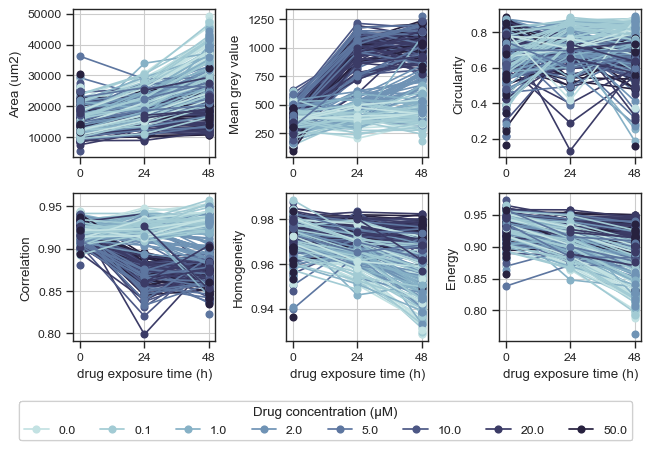

In [14]:
features = ['Area (um2)',
            'Mean grey value',
            'Circularity',
            'Correlation',
            'Homogeneity',
            'Energy',
           # 'Solidity',
           # 'Equivalent Diameter (um)',
            #'Perimeter (um)'
            ]

df = df_A673.copy()
fig, axes = plt.subplots(2, 3, figsize=(6.6, 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    featureVSday(fig, axes[i], df, feature, legend_display=True, palette=palette_drug_A673)

# Hide x labels for the first line
for ax in axes[:3]:
    ax.set_xlabel('') 

plt.tight_layout()
plt.savefig(fig_folder / "S2 feature VS time A673.svg", format='svg', bbox_inches='tight', transparent=False)
plt.show()

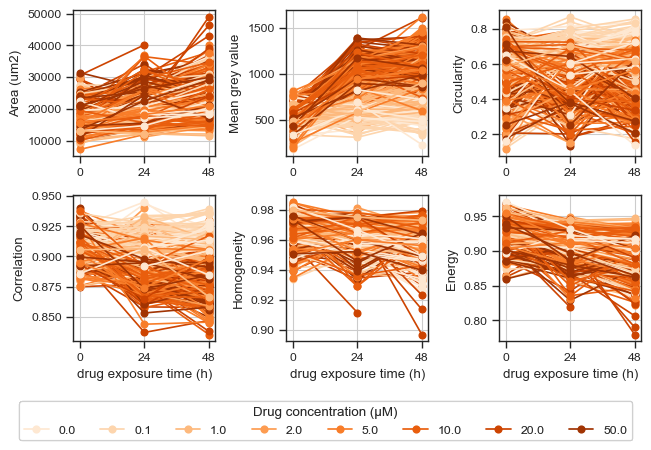

In [15]:
df = df_PDX.copy()
fig, axes = plt.subplots(2, 3, figsize=(6.6, 4))
axes = axes.flatten()


for i, feature in enumerate(features):
    featureVSday(fig, axes[i], df, feature, legend_display=True, palette=palette_drug_PDX)


# Hide x labels for the first line
for ax in axes[:3]:
    ax.set_xlabel('') 

plt.tight_layout()
plt.savefig(fig_folder / "S2 feature VS time PDX.svg", format='svg', bbox_inches='tight', transparent=False)
plt.show()

### Plot Metabolic activity VS drug

In [16]:
# Define sigmoide equation for the fitting
def sigmoid_normalized(x, IC50, slope):
    return  100 / ( 1 + (IC50 / x) ** slope)

def plot_IC50(fig, ax, df, x, y, title="", sigmoidFit=True, marker='o', marker_col='b', line='-', line_col='b', marker_size=10, line_size=2):
    # For the log representation and fit, change the concentration '0' into a low concentration
    df.loc[:, x] = df[x].replace(0, 0.01)

    ### Plot the data as a scatter plot
    sns.scatterplot(data=df, x=x, y=y, ax=ax,
                    s=marker_size, marker=marker, color=marker_col,  alpha=0.5, legend=False) 

    ### Sigmoid fit
    if sigmoidFit == True:
        X = df[x]
        Y = df[y]

        # For the log representation and fit, change the concentration '0' into a low concentration
        X = X.replace(0, 0.01) 

        # Fit a sigmoid on the data
        ini_param = [np.median(X), -1]
        popt, pcov = curve_fit(sigmoid_normalized, X, Y, p0=ini_param)
        IC50, slope = popt

        # Create points for the fitted curve & plot
        x_fit = np.linspace(min(X), max(X), 10000)
        y_fit = sigmoid_normalized(x_fit, *popt)
        
        # Plot curve
        sns.lineplot(x=x_fit, y=y_fit, 
                            linestyle=line, color=line_col, linewidth=line_size, ax=ax)

        
    ### Graph personalization
    # Define axes limits
    ax.set_xlim(0.007, 100)
    ax.set_xscale('log')

    # Change graduation
    x_ticks = [0.01, 0.1, 1, 10, 100]
    x_labels = ['0'] + [str(l) for l in x_ticks[1::]]
    ax.set_xticks(x_ticks, labels=x_labels)

    ax.set_title(title)

    # Set x & y axis names
    ax.set_xlabel(x)
    ax.set_ylabel(y)        
        
    ax.grid(True)
    
    return IC50, slope, popt, pcov




A673:
IC50 exp 1803 = 2.8190981787005724 µM
IC50 exp 2602 = 3.558137437753835 µM
IC50 exp 2901 = 3.181926138989865 µM

PDX:
IC50 exp 1305 = 2.5620492364345537 µM
IC50 exp 1806 = 1.2691319355873085 µM
IC50 exp 2406 = 2.027990378640377 µM


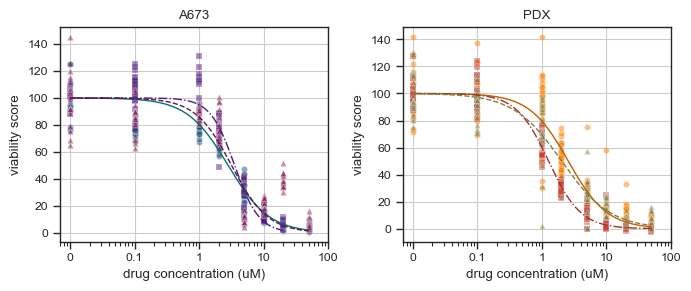

In [17]:
x = 'drug concentration (uM)'
y = 'viability score'

# Initialize the figure, 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(7,3))
axes = axes.flatten()

print("A673:")
df = df_A673.copy()
exps = df['Experiment ID'].unique()

for exp in exps:
    df_filt = df[df['Experiment ID'] == exp]
    kws_dict = kws_dict_A673[exp]
    marker = kws_dict['marker']
    line = kws_dict['line']
    marker_col = kws_dict['marker_col']
    line_col = kws_dict['line_col']
    marker_size = kws_dict['marker_size']
    line_size = kws_dict['line_size']

    IC50, _, _, _ = plot_IC50(fig, axes[0], df_filt, x, y, title="A673", sigmoidFit=True, marker=marker, marker_col=marker_col, line=line, line_col=line_col, marker_size=marker_size, line_size=line_size)
    print(f"IC50 exp {exp} = {IC50} µM")

print("\nPDX:")
df = df_PDX.copy()
exps = df['Experiment ID'].unique()

for exp in exps:
    df_filt = df[df['Experiment ID'] == exp]
    kws_dict = kws_dict_PDX[exp]
    marker = kws_dict['marker']
    line = kws_dict['line']
    marker_col = kws_dict['marker_col']
    line_col = kws_dict['line_col']
    marker_size = kws_dict['marker_size']
    line_size = kws_dict['line_size']

    IC50, _, _, _ = plot_IC50(fig, axes[1], df_filt, x, y, title="PDX", sigmoidFit=True, marker=marker, marker_col=marker_col, line=line, line_col=line_col, marker_size=marker_size, line_size=line_size)
    print(f"IC50 exp {exp} = {IC50} µM")
plt.tight_layout()
plt.show()


### Plot the features VS drug

In [18]:
def sigmoid(x, B, T, IC50, slope):
    return B + (T - B) / (1 + (IC50 / x) ** slope)

In [19]:
def featureVSdrug(df, x, y, ax, limits_y, kws_dict, fit=True, grad=True):
    # Replace concentration 0 for log plot
    df.loc[:, x] = df[x].replace(0, 0.01)

    # Parameters for personalization
    marker = kws_dict['marker']
    line = kws_dict['line']
    marker_col = kws_dict['marker_col']
    line_col = kws_dict['line_col']
    marker_size = kws_dict['marker_size']
    line_size = kws_dict['line_size']

    ### Plot data
    sns.scatterplot(data=df, x=x, y=y, ax=ax,
                    s=marker_size, marker=marker, color=marker_col,  alpha=0.5, legend=False)     
        
    
    ### Sigmoid fit
    if fit == True:
        # Fit the features
        B, T, IC50, slope, pcov = 0,0,0,0,0
        df_filt = df[[x, y]].dropna(subset=[y])
        
        if len(df_filt) != 0:
            X = df_filt[x]
            Y = df_filt[y]
            
            try:
                ini_param = [min(Y), max(Y), np.median(X), 1]
                popt, pcov = curve_fit(sigmoid, X, Y, p0=ini_param)
                B, T, IC50, slope = popt

                # Create points for the fitted curve
                x_fit = np.linspace(min(X), max(X), 10000)
                y_fit = sigmoid(x_fit, *popt)
            
                # Plot
                sns.lineplot(x=x_fit, y=y_fit, 
                            linestyle=line, color=line_col, linewidth=line_size, ax=ax)
                
            except RuntimeError as e:
                pass
        
       
    ### Axes formatting
    ax.set_xscale('log')
    ax.set_xlim(0.007,110)
    ax.set_xticks([0.01,0.1,1,10,100])
    ax.set_xlabel('Drug concentration [µM]')
    ax.set_xticklabels(['0', '0.1', '1', '10','100'])
    ax.grid(True)
    
    ax.set_ylabel(y.split('_')[0])
    
    limits_y_key = next((key for key in limits_y if y.startswith(key)), None)
    value = limits_y.get(limits_y_key, None)
    
    if limits_y_key != None:
        ax.set_ylim(value)
    
    if grad == False :
        ax.set_yticklabels([])
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_xlabel('')

##### Determine y lim
Same ylim for the same features.

In [20]:
feats = ['Area (um2)',
       'Mean grey value',
       'Homogeneity',
       'Energy',
       'Correlation',
       'Solidity',
       'Circularity',
       'Equivalent Diameter (um)',
       'Perimeter (um)',
       'Growth', 
       'Grey',
        'DCorrelation_'
        ]

In [21]:
limits_y = {}

for feat in feats:
    if feat != 'Growth' and  feat != 'Grey' and feat != 'DCorrelation_' :
        cols = [f'{feat}_day0', f'{feat}_day1', f'{feat}_day2']
    else:
        cols = [f'{feat}2-0', f'{feat}2-1', f'{feat}1-0']
        
    
    data_A673 = df_A673[cols].values
    data_PDX = df_PDX[cols].values
    data = np.concatenate([data_A673, data_PDX], axis=0)

    # Compute minimal and maximal values
    y_min = np.nanmin(data)
    y_max = np.nanmax(data)

    # Add a 10% marge around the extreme values
    marge = 0.05 * (y_max - y_min)
    y_min -= marge
    y_max += marge
    y_min = round(y_min,2)
    y_max = round(y_max,2)

    # Save the limits of each feature in a dictionnary
    limits_y[feat] = (y_min,  y_max)

limits_y

{'Area (um2)': (3435.9, 51413.14),
 'Mean grey value': (21.96, 1696.17),
 'Homogeneity': (0.89, 0.99),
 'Energy': (0.75, 0.98),
 'Correlation': (0.79, 0.97),
 'Solidity': (0.43, 1.01),
 'Circularity': (0.08, 0.93),
 'Equivalent Diameter (um)': (76.28, 258.66),
 'Perimeter (um)': (214.56, 1878.13),
 'Growth': (-17616.84, 35141.75),
 'Grey': (-662.08, 1175.59),
 'DCorrelation_': (-0.14, 0.09)}

#### Plot & save figures

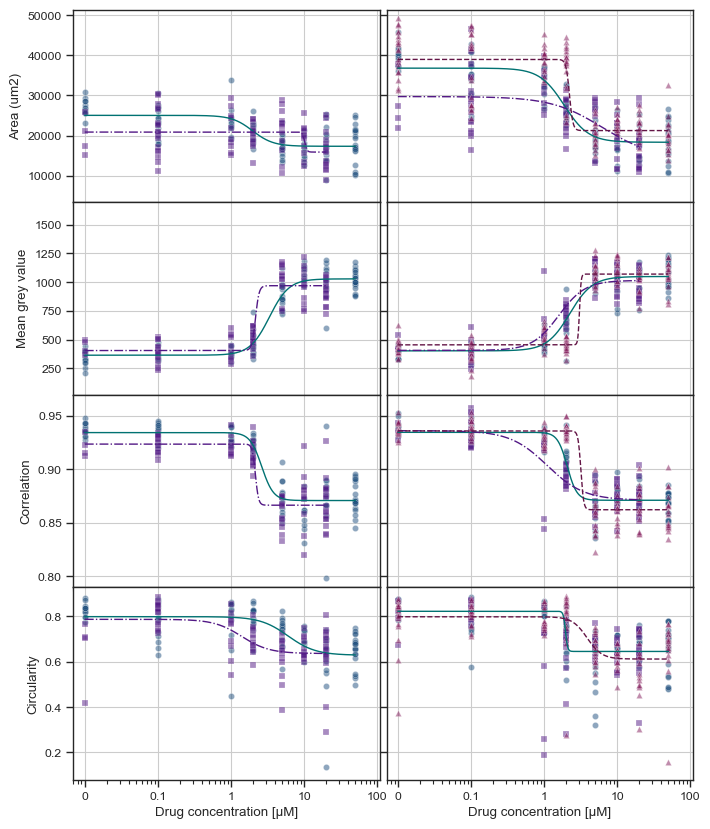

In [22]:
y_list = [ 
    'Area (um2)_day1', 'Area (um2)_day2',
    'Mean grey value_day1', 'Mean grey value_day2',
    'Correlation_day1', 'Correlation_day2',
    'Circularity_day1', 'Circularity_day2', 
    ]

# Plot A673 data
df = df_A673.copy()
kws_dict = kws_dict_A673
exps = df['Experiment ID'].unique()

# Initiaze figure
fig, axes = plt.subplots(4, 2, figsize = (8, 10), sharey = 'row', sharex=True)
axes = axes.flatten()

# Plot feature vs drug for each feature
for i, y in enumerate(y_list):
    for exp in exps:
        kws_dict_exp = kws_dict[exp]
        df_filt = df[df['Experiment ID'] == exp]
        featureVSdrug(df_filt, x, y, axes[i], limits_y, kws_dict_exp, fit=True, grad=True)

plt.subplots_adjust(hspace=0, wspace=0.02)
plt.show()

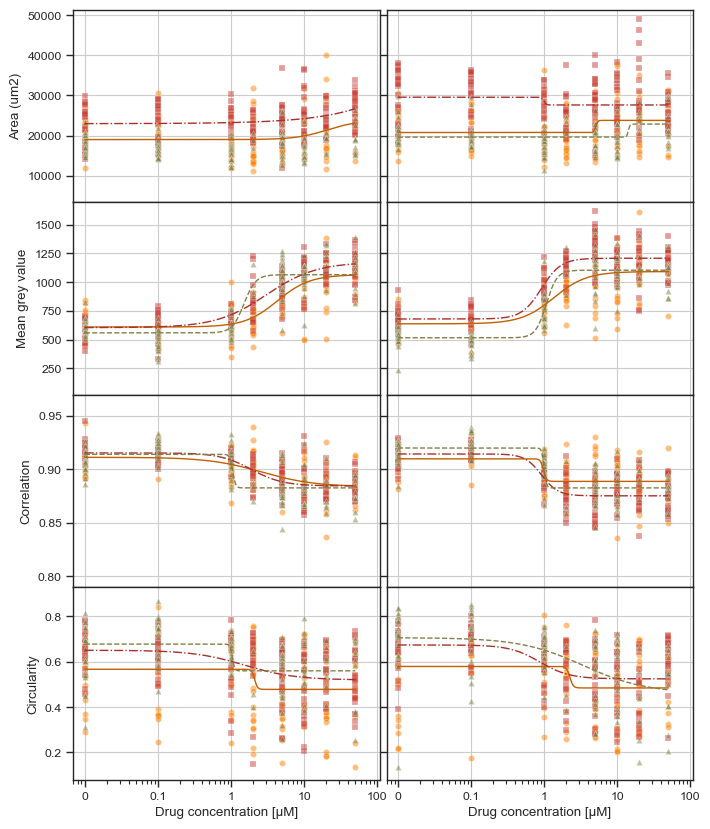

In [23]:
# Plot PDX data
df = df_PDX.copy()
kws_dict = kws_dict_PDX
exps = df['Experiment ID'].unique()

fig, axes = plt.subplots(4, 2, figsize = (8, 10), sharey = 'row', sharex=True)
axes = axes.flatten()


for i, y in enumerate(y_list):
    for exp in exps:
        kws_dict_exp = kws_dict[exp]
        df_filt = df[df['Experiment ID'] == exp]
        featureVSdrug(df_filt, x, y, axes[i], limits_y, kws_dict_exp, fit=True, grad=True)

plt.subplots_adjust(hspace=0, wspace=0.02)
plt.show()

### Histogram feature VS class

In [24]:
df_A673.columns

Index(['spheroid ID', 'Experiment ID', 'drug concentration (uM)',
       'spheroIndex', 'Area (um2)_day0', 'Area (um2)_day1', 'Area (um2)_day2',
       'Mean grey value_day0', 'Mean grey value_day1', 'Mean grey value_day2',
       'Homogeneity_day0', 'Homogeneity_day1', 'Homogeneity_day2',
       'Energy_day0', 'Energy_day1', 'Energy_day2', 'Correlation_day0',
       'Correlation_day1', 'Correlation_day2', 'Solidity_day0',
       'Solidity_day1', 'Solidity_day2', 'Circularity_day0',
       'Circularity_day1', 'Circularity_day2', 'Equivalent Diameter (um)_day0',
       'Equivalent Diameter (um)_day1', 'Equivalent Diameter (um)_day2',
       'Perimeter (um)_day0', 'Perimeter (um)_day1', 'Perimeter (um)_day2',
       'Growth1-0', 'Growth2-0', 'Growth2-1', 'Grey1-0', 'Grey2-0', 'Grey2-1',
       'DCorrelation_1-0', 'DCorrelation_2-0', 'DCorrelation_2-1',
       'viability score', '2 classes', '2 classes encoded', '3 classes',
       '3 classes encoded'],
      dtype='object')

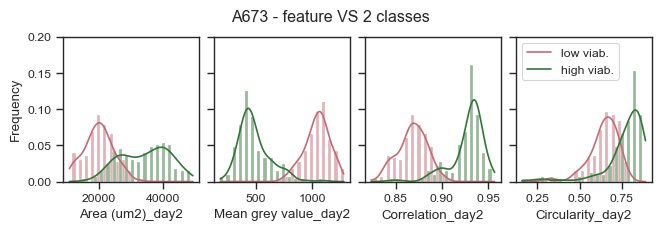

In [25]:
df = df_A673.copy()
n_class = 2

cols = [i for i in features if i.endswith('day2')]
cols = [
    'Area (um2)_day2',
    'Mean grey value_day2',
    'Correlation_day2',
    'Circularity_day2',

"""    'Grey2-0',
    'Energy_day2',
    'Growth2-0',
    'Homogeneity_day2',
    'Equivalent Diameter (um)_day2',
    'Solidity_day2'"""
            ]


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6.5, 2.2), constrained_layout=True, sharey=True)
axes = axes.flatten()

fig.suptitle(f'A673 - feature VS {n_class} classes')


labels = df[f'{n_class} classes'].unique()

for idx, col in enumerate(cols):
    if idx < len(axes):
        sns.histplot(data=df, x=col, hue=f'{n_class} classes', palette=palette_class, multiple='dodge', legend=False,
                     shrink=1, ax=axes[idx], bins=20, stat='probability', kde=True
                     )
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

axes[-1].legend(['low viab.', 'high viab.'])
axes[0].set_ylim(0, 0.2)

plt.savefig(fig_folder / "4A histogram feature vs class A673.svg", format='svg', bbox_inches='tight', transparent=True)

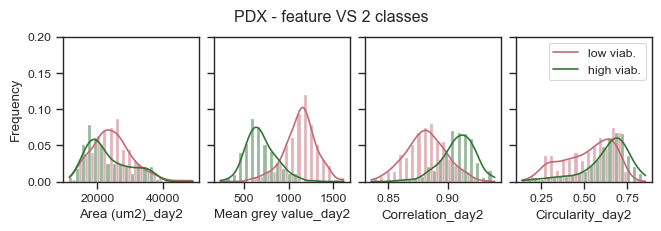

In [26]:
X_2classes = df_PDX['2 classes encoded']
df = df_PDX.copy()

cols = [i for i in features if i.endswith('day2')]
cols = ['Area (um2)_day2',
 'Mean grey value_day2',
 #'Homogeneity_day2',
 #'Energy_day2',
 'Correlation_day2',
 'Circularity_day2']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6.5, 2.2),constrained_layout=True, sharey = True)
axes = axes.flatten()
fig.suptitle('PDX - feature VS 2 classes')

labels = df_A673['2 classes'].unique()

for idx, col in enumerate(cols):
    if idx < len(axes):
        sns.histplot(data=df, x=col, hue='2 classes', palette=palette_class, multiple='dodge', legend=False,
                     shrink=1, ax=axes[idx], bins=20, stat='probability', kde=True
                     )
        
        
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

axes[-1].legend(['low viab.', 'high viab.'])
axes[0].set_ylim(0, 0.2)

plt.savefig(fig_folder / "4C histogram feature vs class PDX.svg", format='svg', bbox_inches='tight', transparent=True)

## Other representations

### Grey level VS viability vs drug

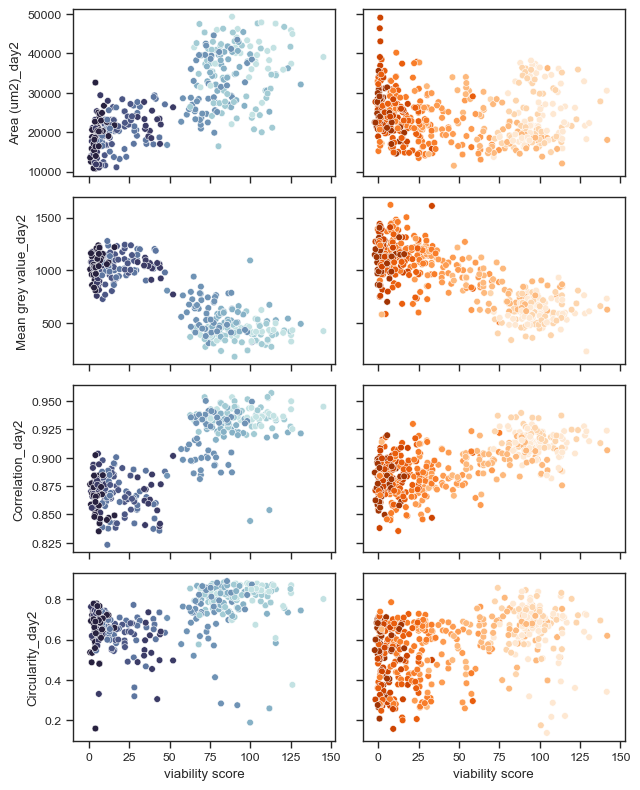

In [27]:
x = 'viability score'
y = ['Area (um2)_day2', 'Mean grey value_day2', 'Correlation_day2', 'Circularity_day2']
hue = 'drug concentration (uM)'

fig, axes = plt.subplots(4, 2, figsize=(6.5, 8), sharex=True, sharey='row')
axes = axes.flatten()

df = df_A673.copy()
df[hue] = pd.Categorical(df[hue], ordered=True)
for i in range(8):
    if i%2==0:
        sns.scatterplot(data=df, x=x, y=y[int(i/2)], hue=hue, palette=palette_drug_A673, ax=axes[i], legend=False)

df = df_PDX.copy()
df[hue] = pd.Categorical(df[hue], ordered=True)
for i in range(8):
    if i%2!=0:
        sns.scatterplot(data=df, x=x, y=y[int(i/2)], hue=hue, palette=palette_drug_PDX, ax=axes[i], legend=False)

plt.tight_layout()
plt.savefig(fig_folder / "S8 features VS viability vs drug.svg", format='svg', bbox_inches='tight', transparent=True)


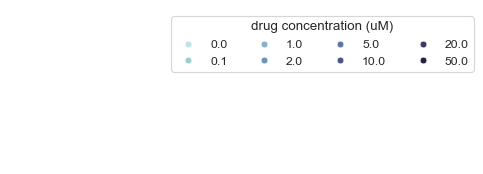

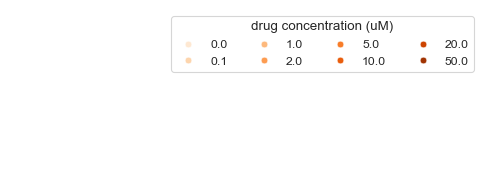

In [28]:

# Legend
fig, axes = plt.subplots(1, 1, figsize=(2,2))
sns.scatterplot(data=df, x=x, hue=hue, palette=palette_drug_A673, ax=axes, legend=True)
sns.move_legend(axes, loc='upper left', bbox_to_anchor=(1, 1), ncol=4)
axes.axis('off')
plt.savefig(fig_folder / "S8 legend1.svg", format='svg', bbox_inches='tight', transparent=True)

# Legend
fig, axes = plt.subplots(1, 1, figsize=(2,2))
sns.scatterplot(data=df, x=x, hue=hue, palette=palette_drug_PDX, ax=axes, legend=True)
sns.move_legend(axes, loc='upper left', bbox_to_anchor=(1, 1), ncol=4
                )
axes.axis('off')
plt.savefig(fig_folder / "S8 legend2.svg", format='svg', bbox_inches='tight', transparent=True)


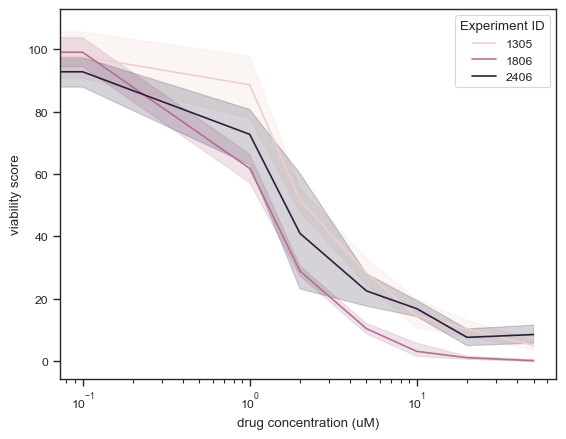

In [29]:
x = 'drug concentration (uM)'
y = 'viability score'
sns.lineplot(x=x, y=y,
        hue = 'Experiment ID',
             data=df,
             markers=True)
plt.xscale('log')

###

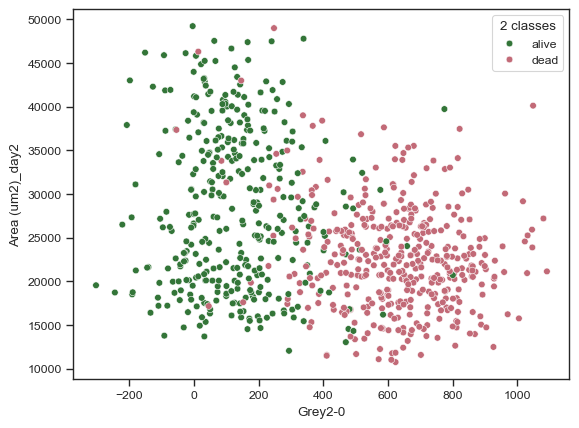

In [30]:
x = 'Grey2-0'
y = 'Area (um2)_day2'
hue = '2 classes'

scatter = sns.scatterplot(data=df_A673, x=x, y=y, hue=hue, palette=palette_class)
scatter = sns.scatterplot(data=df_PDX,  x=x, y=y, hue=hue, palette=palette_class, legend=False)

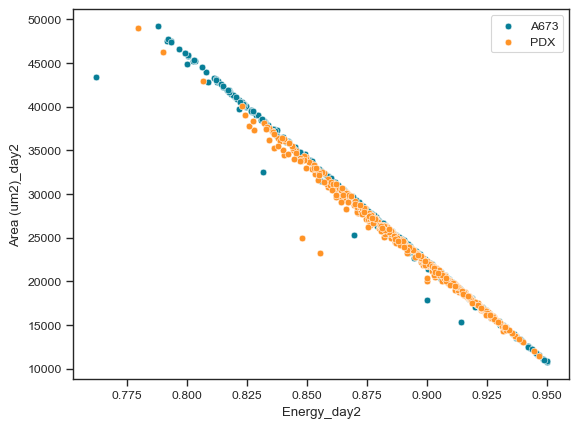

In [31]:
x = 'Energy_day2'
y = 'Area (um2)_day2'

scatter = sns.scatterplot(data=df_A673, x=x, y=y, color=palette_cells['A673'], label='A673')
scatter = sns.scatterplot(data=df_PDX, x=x, y=y, color=palette_cells['PDX'], label='PDX')

<Axes: xlabel='viability score', ylabel='Area (um2)_day2'>

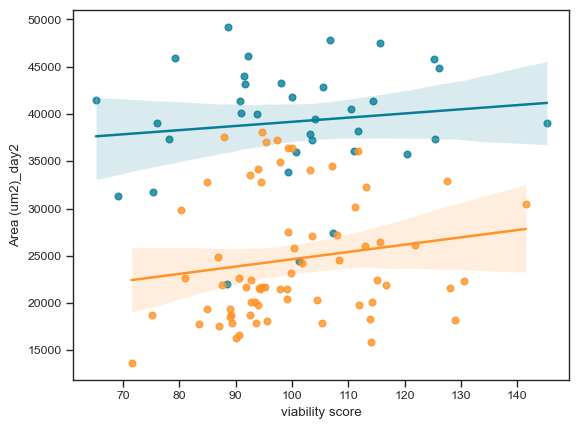

In [32]:
x = 'viability score'
y = 'Area (um2)_day2'

sns.regplot(data=df_A673[df_A673['drug concentration (uM)']==0], x=x, y=y, color=palette_cells['A673'], label='A673')
sns.regplot(data=df_PDX[df_PDX['drug concentration (uM)']==0], x=x, y=y, color=palette_cells['PDX'], label='PDX')

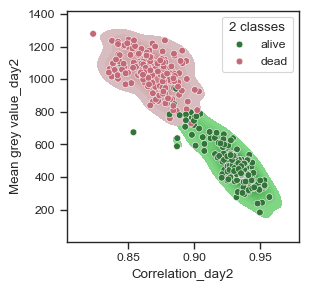

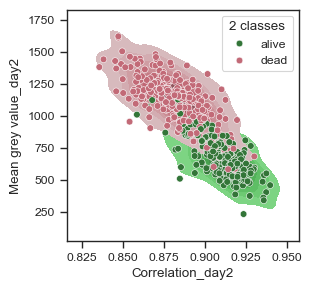

In [33]:
x = 'Correlation_day2'
y = 'Mean grey value_day2'
classe = '2 classes'

df = df_A673.copy()

fig, ax = plt.subplots(figsize=(3, 3))
sns.kdeplot(data=df, x=x, y=y, hue=classe,
    fill=True, palette=palette_class)
scatter = sns.scatterplot(data=df, x=x, y=y, hue=classe, palette=palette_class)

df = df_PDX.copy()

fig, ax = plt.subplots(figsize=(3, 3))
sns.kdeplot(data=df, x=x, y=y, hue=classe,
    fill=True, palette=palette_class, ax=ax
)
scatter = sns.scatterplot(data=df, x=x, y=y, hue=classe, palette=palette_class)

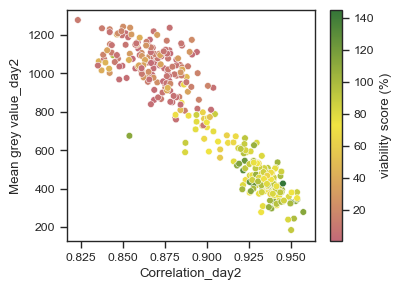

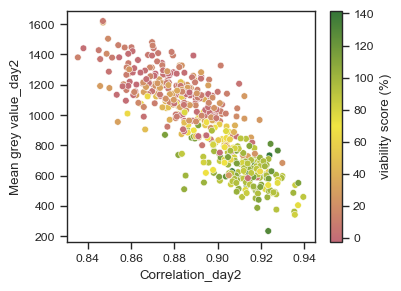

In [34]:
### Color palette
color_start = (194/255, 106/255, 119/255)  # reddish color
color_middle = (240/255, 228/255, 66/255)  # yellowish color
color_end = (51/255, 117/255, 56/255)  # greenish color

# Create a custom colormap that transitions through the three colors
continuous_cmap = LinearSegmentedColormap.from_list("custom_palette", [color_start, color_middle, color_end])


x = 'Correlation_day2'
y = 'Mean grey value_day2'
viab = 'viability score'

df = df_A673.copy()

fig, ax = plt.subplots(figsize=(4, 3))
scatter = sns.scatterplot(data=df, x=x, y=y, hue=viab, palette=continuous_cmap, legend=None, ax=ax)
# Add a color bar to indicate the continuous values
norm = plt.Normalize(df[viab].min(), df[viab].max())
sm = plt.cm.ScalarMappable(cmap=continuous_cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('viability score (%)')


df = df_PDX.copy()

fig, ax = plt.subplots(figsize=(4, 3))
scatter = sns.scatterplot(data=df, x=x, y=y, hue=viab, palette=continuous_cmap, legend=None, ax=ax)
# Add a color bar to indicate the continuous values
norm = plt.Normalize(df[viab].min(), df[viab].max())
sm = plt.cm.ScalarMappable(cmap=continuous_cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax = ax)
cbar.set_label('viability score (%)')